# Define the agents

In [ ]:

def create_agent():
    return {
        'id': 0,
        'alpha': 0.0,
        'goods': 0.0,
        'eta': 0.0,
        'money': 0.0,
        'utility': 0.0,
        'num_intra_connections': 0,
        'intra_connections': 0,
        'num_inter_connections': 0,
        'inter_connections':0,
        'Util_func': 0
    }



## define encounter matrix

In [ ]:
import numpy as np

# Create a 100x100 matrix filled with 1s
matrix = np.ones((100, 100))

# And  Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)


## Define Economy A

In [ ]:
import random
# Creating the lists
id_list = [i for i in range(100)]
# Aloha is 3
alpha = [2]*100
# Eta is 3
eta = [2]*100
# MOney and Goods for each agent is 60; Total G and M are 6000.
goods = [200 for _ in range(100)]
money = [200 for _ in range(100)]
# define the encounter matrix
inter_connections=matrix
intra_connections=0

In [ ]:
agent_a = create_agent()
agent_a['id_list'] = id_list
agent_a['alpha']=alpha
agent_a['eta']=eta
agent_a['money']=money
agent_a['goods']=goods
agent_a['intra_connections']=intra_connections
agent_a['inter_connections']=inter_connections


#Defne  Economy B

In [ ]:
import random
# Creating the lists
id_list = [i for i in range(100)]
# Aloha is 3
alpha = [3]*100
#Half Eta is 3, Half Eta is 2
eta = [3]*100
# MOney and Goods for each agent is 60; Total G and M are 6000.
goods = [150 for _ in range(100)]
money = [150 for _ in range(100)]
# define the encounter matrix
inter_connections=matrix
intra_connections=0

In [ ]:
agent_b = create_agent()
agent_b['id_list'] = id_list
agent_b['alpha']=alpha
agent_b['eta']=eta
agent_b['money']=money
agent_b['goods']=goods
agent_b['intra_connections']=intra_connections
agent_b['inter_connections']=inter_connections

In [ ]:
# define the Cobb douglas utility function
def utility_func(g1,g2,m1,m2,alpha1,alpha2,eta1,eta2):
  a=m1**(eta1-1)
  b=m2**(eta2-1)
  c=g1**(alpha1-1)
  d=g2**(alpha2-1)
  utility=a*b*c*d
  utility=float(utility)
  return utility

## trade function

In [ ]:


def random_pick(g, G1, a):
    # Randomly select a number within the range [g-mg, g+mg]
    delta_g=round(G1*a)
    new_g = random.randint(g - delta_g, g + delta_g)

    # Apply the reflex logic, if g picked is out of range, then take the reflex value, this makes
    # See the metroplis formula

    if new_g < 0.5:
        new_g = 1- new_g
    elif new_g > G1-0.5:
        new_g = 2*(G1-0.5) - new_g
    if new_g==0 or new_g==G1:
      print('Error',G1,g,delta_g)
    return new_g




In [ ]:
def random_pick2(g, G, a):
    # Randomly select a number within the range [g-mg, g+mg]
    delta_g=G*a
    new_g = random.uniform(g - delta_g, g + delta_g)

    # Apply the reflex logic
    if new_g < 0.1:
        new_g = 0.2- new_g
    elif new_g > G-0.1:
        new_g = 2*(G-0.1) - new_g

    return new_g

In [ ]:
import random
import math

def trade(good1,good2,money1,money2,eta1,eta2,alpha1,alpha2):


    i=0
    M=money1+money2
    G=good1+good2

    money_list=[]
    while i <100:

        # Generate a random reallocation,pick new g1&m1 in range 0.3 of Total G and M
        new_good  = random_pick(good1,G,0.3)
        new_money = random_pick(money1,M,0.3)




        # Calculate the change in utility
        utility1 = utility_func(good1,good2,money1,money2, alpha1,alpha2, eta1,eta2)

        utility2 =utility_func(new_good,(G-new_good),new_money,(M-new_money), alpha1,alpha2, eta1,eta2)

        # The Metropolis algorithm
        if utility2 > utility1:
            # Accept the reallocation


            money1 = new_money

            money2 = M-new_money
            good1=new_good
            good2=G-new_good

        else:
            # Decide with a probability whether to accept the reallocation
            probability = (utility2/utility1)
            if random.random() < probability:


                money1 = new_money

                money2 = M-new_money

                good1=new_good

                good2=G-new_good



        i=i+1




    return good1,good2,money1,money2






In [ ]:
import random

def encounter1(matrix):
    # Pick a random row
    row = random.choice(range(len(matrix)))

    # Pick a random column different from the row
    possible_cols = [i for i in range(len(matrix[0])) if i != row]
    col = random.choice(possible_cols)

    return row, col





# metropolis

In [ ]:


def full_trade(agent,length):
  matrix=agent['inter_connections']
  money=agent['money'].copy()
  goods=agent['goods'].copy()
  eta=agent['eta']
  alpha=agent['alpha']
  num_agent=100
  money_history=[]
  good_history=[]
  for i in range(length):
    a1,a2=encounter1(matrix)

    money1=money[a1]
    money2=money[a2]
    good1=goods[a1]
    good2=goods[a2]
    alpha1=alpha[a1]
    alpha2=alpha[a2]
    eta1=eta[a1]
    eta2=eta[a2]

    g1n,g2n,m1n,m2n=trade(good1,good2,money1,money2,alpha1,alpha2,0,0)
    money[a1]=m1n
    money[a2]=m2n
    goods[a1]=g1n
    goods[a2]=g2n
    money_history.append(money.copy())
    good_history.append(goods.copy())

  return goods,money,money_history,good_history








# sample

In [ ]:
g,m,g_his,m_his=full_trade(agent_a,1000)


In [ ]:
m

# agentb

###HIde

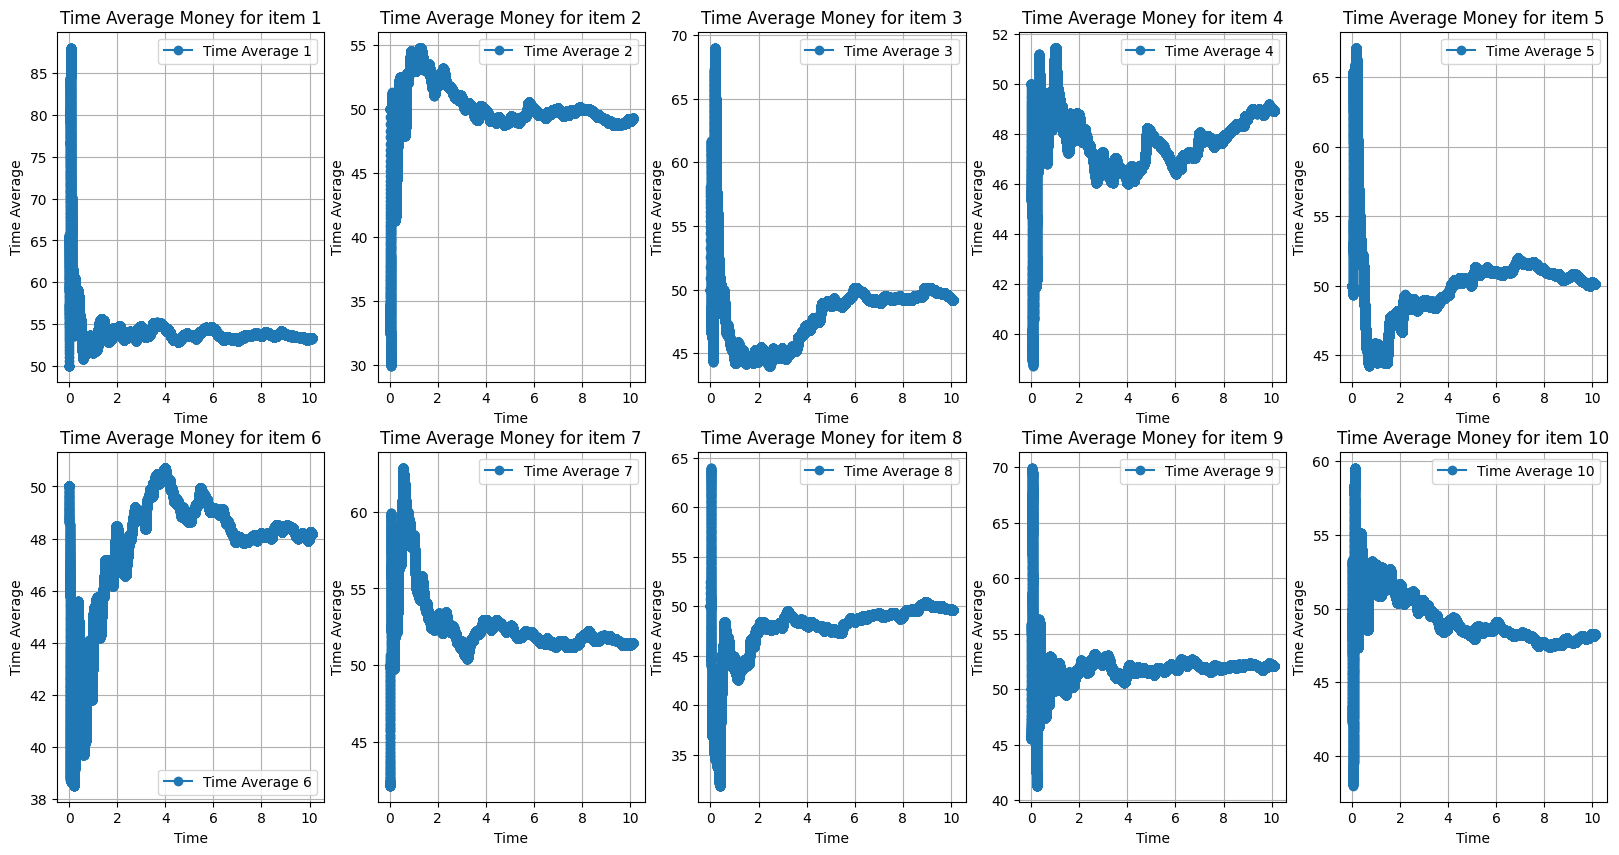

In [ ]:
import matplotlib.pyplot as plt

numbers = list(range(1, 100001))
time_index = [num / 9900 for num in numbers]



# Prepare the figure and axes for a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
list_m=[]
# Iterate over each item from 1 to 10 in the sublist
for idx in range(1,11 ):
    extracted_items = [sublist[idx] for sublist in m_his]
    cumulative_sum = np.cumsum(extracted_items)
    time_average = [cumulative_sum[i] / (i+1) for i in range(len(extracted_items))]


    log_m = [math.log(abs(item - 50)+1) for item in time_average]
    list_m.append(log_m)
    ax = axes[(idx-1)//5, (idx-1)%5]
    ax.plot(time_index, time_average, '-o', label=f'Time Average {idx}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Time Average')
    ax.set_title(f'Time Average Money for item {idx}')
    ax.legend()
    ax.grid(True)










average_list = [np.mean([sublist[i] for sublist in list_m]) for i in range(len(list_m[0]))]




log_t = [math.log(item) for item in time_index]

In [ ]:
g,m,g_his,m_his=full_trade(agent_b)

##plot func

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_time_average(lista,numbera):
  numbers = list(range(1, 100001))
  time_index = [num / 9900 for num in numbers]
  # Assuming list2k is defined and contains your data
  len_list=len(lista)+1
  # Extract the first item from each sublist
  extracted_items = [sublist[numbera] for sublist in lista]

  # Calculate the time average
  cumulative_sum = np.cumsum(extracted_items)
  time_average = [cumulative_sum[i] / (i+1) for i in range(len(extracted_items))]

  # Prepare numbers and result1 as in your original code
  numbers = list(range(1, len_list))
  result1 = [num / 9900 for num in numbers]

  # Create the plot
  plt.figure(figsize=(5, 5))
  plt.plot(time_index, time_average, '-o',color='blue')
  plt.xlabel('Time')
  plt.ylabel('Time-averaged Money')

  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()


In [ ]:
import matplotlib.pyplot as plt
def plot_log(lista):
  k=len(lista)+1
  numbers = list(range(1, 100001))
  time_index = [num / 9900 for num in numbers]



  # Prepare the figure and axes for a 2x5 grid

  list_m=[]
  # Iterate over each item from 1 to 10 in the sublist
  for idx in range(0,99):
      extracted_items = [sublist[idx] for sublist in lista]
      cumulative_sum = np.cumsum(extracted_items)
      time_average = [cumulative_sum[i] / (i+1) for i in range(len(extracted_items))]




      log_m = [math.log(0.01) if abs(item - 50) < 0.01 else math.log(abs(item - 50) ) for item in time_average]
      list_m.append(log_m)












  average_list = [np.mean([sublist[i] for sublist in list_m]) for i in range(len(list_m[0]))]




  log_t = [math.log(item) for item in time_index]
  plt.figure(figsize=(5, 5))
  # Create a scatter plot
  plt.scatter(log_t, average_list, marker='o', color='blue')

  # Add labels and a title
  plt.xlabel('Log_Time')
  plt.ylabel('Log(Average Money -M/N)')


  # Display the plot
  plt.grid(True)
  plt.show()

## Homogeneous Economy


In [ ]:
g,m,g_his,m_his=full_trade(agent_a,100000)

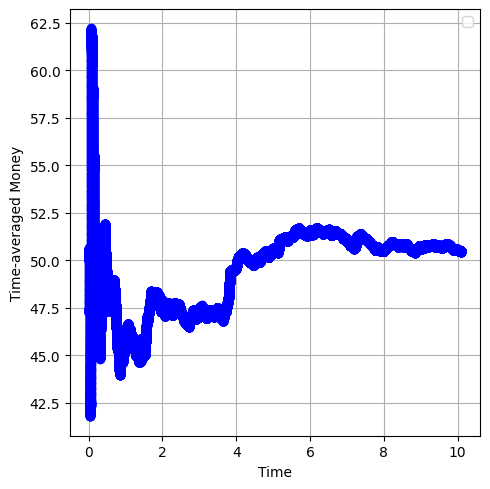

In [ ]:
plot_time_average(m_his,0)



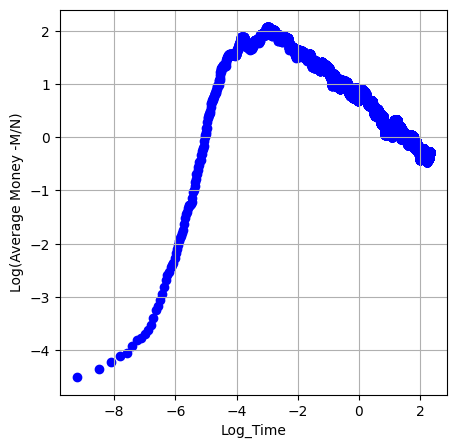

In [ ]:
plot_log(m_his)

## Heterogeneous Economy


In [ ]:
g2,m2,g_his2,m_his2=full_trade(agent_b)

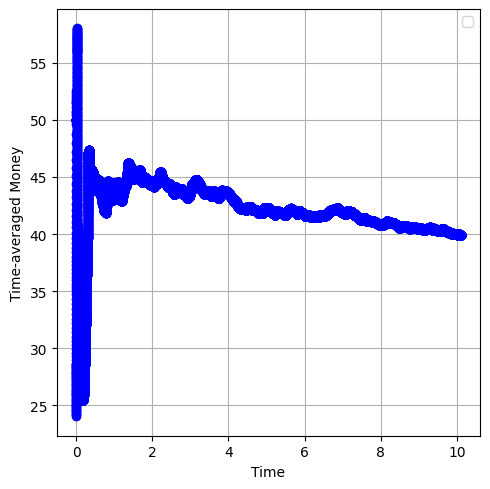

In [ ]:
plot_time_average(m_his2,80)

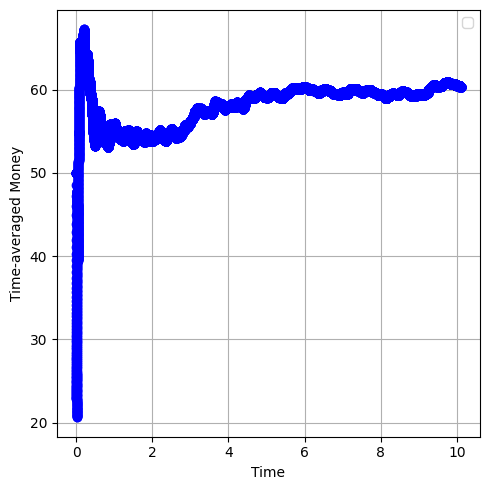

In [ ]:
plot_time_average(m_his2,20)

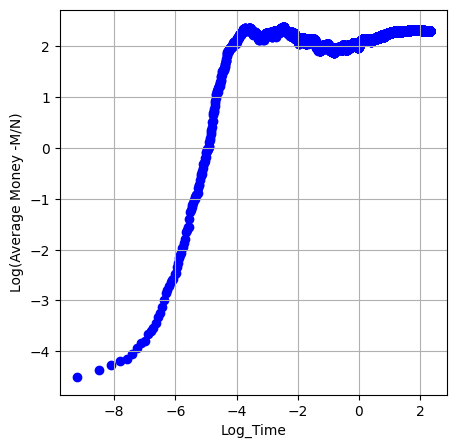

In [ ]:
plot_log(m_his2)

## variance

In [ ]:
# Shows average varaince for eta=2/3, the theoretical value for 0-49 is 1200 and 50-99 is 800.


last_1000 = [sublist[-1000:] for sublist in m_his]

# Calculate average variance for positions 0-49
variances_0_49 = [np.var([sublist[i] for sublist in last_1000]) for i in range(50)]
average_variance_0_49 = np.mean(variances_0_49)

# Calculate average variance for positions 50-99
variances_50_99 = [np.var([sublist[i] for sublist in last_1000]) for i in range(50, 100)]
average_variance_50_99 = np.mean(variances_50_99)

print("Average Variance for indices 0-49:", average_variance_0_49)
print("Average Variance for indices 50-99:", average_variance_50_99)


Average Variance for indices 0-49: 1186.5161842123673
Average Variance for indices 50-99: 787.7337553580708


In [ ]:
def compute_variance(item_list, size):
    values = []
    for item in item_list:
        # Pick random indices
        indices = np.random.choice(100, size=size, replace=False)
        # Sum the values at these indices
        value_sum = sum(item[i] for i in indices)
        values.append(value_sum)
    return np.var(values),size

In [ ]:
numbers = [6, 7, 8, 9]

  # Randomly pick one number
size= random.choice(numbers)
type(size)

int

In [ ]:
# show some combinations
a=[]
b=[]
c=[]
d=[]
for _ in range(400):
  numbers = [6, 7, 8, 9]

  # Randomly pick one number
  size= random.choice(numbers)


  va, vt = compute_variance(last_1000,size)  # Assuming last_1000 is defined somewhere or can be different each iteration
  if vt == 6:
      a.append(va)
  elif vt == 7:
      b.append(va)
  elif vt == 8:
      c.append(va)
  elif vt == 9:
      d.append(va)

# Calculate means of each list
mean_a = sum(a) / len(a) if a else 0
mean_b = sum(b) / len(b) if b else 0
mean_c = sum(c) / len(c) if c else 0
mean_d = sum(d) / len(d) if d else 0

print("Mean of list a:", mean_a)
print("Mean of list b:", mean_b)
print("Mean of list c:", mean_c)
print("Mean of list d:", mean_d)




Mean of list a: 6219.622489703653
Mean of list b: 7175.9358915995845
Mean of list c: 8113.214901699308
Mean of list d: 9028.273219100665


In [ ]:
len(d)

48

## Homo Kl and KS



In [ ]:
import numpy as np
from scipy.stats import gamma

# Your sample list (replace this with your actual list)

# Sort kl and compute the ECDF
sorted_m = np.sort(m2)
n = len(m2)
ecdf = np.arange(1, n + 1) / n





# Parameters for the gamma distributions
k1, theta1 = 2, 20
k2, theta2 = 3, 20

# Get the CDFs for each distribution
gamma_cdf1 = gamma.cdf(sorted_m, k1, scale=theta1)
gamma_cdf2 = gamma.cdf(sorted_m, k2, scale=theta2)

# Average the two CDFs for the mixture distribution
mixture_cdf = 0.5 * gamma_cdf1 + 0.5 * gamma_cdf2

# Calculate the K-S distance
ks_distance = np.max(np.abs(ecdf - mixture_cdf))

print("K-S distance:", ks_distance)


K-S distance: 0.541635840860488


In [ ]:
import numpy as np
from scipy.stats import gamma
def compute_ks_distance(kl,k1,theta1,k2,theta2):
    # Sort kl and compute the ECDF
    sorted_kl = np.sort(kl)
    n = len(kl)
    ecdf = np.arange(1, n + 1) / n


    # Parameters for the gamma distribution

    gamma_cdf1 = gamma.cdf(sorted_kl, k1, scale=theta1)
    gamma_cdf2 = gamma.cdf(sorted_kl, k2, scale=theta2)
    mixture_cdf = 0.5 * gamma_cdf1 + 0.5 * gamma_cdf2


    # Calculate the K-S distance
    ks_distance = np.max(np.abs(ecdf - mixture_cdf))

    return ks_distance

## KR distance

In [ ]:
def compute_kr_distance(kl,k1,theta1,k2,theta2):
    # Sort kl and compute the ECDF
    sorted_kl = np.sort(kl)
    n = len(kl)
    ecdf = np.arange(1, n + 1) / n

    gamma_cdf1 = gamma.cdf(sorted_kl, k1, scale=theta1)
    gamma_cdf2 = gamma.cdf(sorted_kl, k2, scale=theta2)
    mixture_cdf = 0.5 * gamma_cdf1 + 0.5 * gamma_cdf2

    # Calculate the K-S distance
    kr_distance = np.sum(np.abs(ecdf - mixture_cdf)) / n

    return kr_distance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_log_kr(kl_list, k1, theta1, k2, theta2):
    kr_list = []
    for i in range(len(kl_list)):
        kl = kl_list[i]
        kr = compute_kr_distance(kl,k1, theta1, k2, theta2)
        kr_list.append(kr)

    # Create a list of numbers from 1 to the length of kr_list
    numbers = list(range(1, len(kr_list) + 1))

    # Compute the log of each number divided by 9900
    result = [num / 9900 for num in numbers]
    kr_sublist = kr_list[:300]



    log_kr_list = [math.log(item) for item in kr_sublist]



    result_sublist = result[:300]
    return log_kr_list,result_sublist








In [ ]:
kr,time_kr=plot_log_kr(m_his,3,50/3,3,50/3)


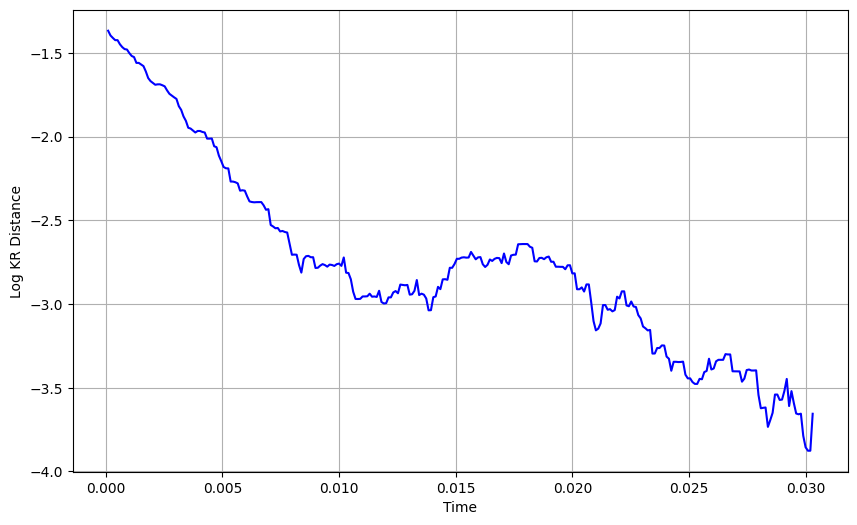

In [ ]:
# Plot kr_list against result
plt.figure(figsize=(10, 6))
plt.plot(time_kr, kr,color='blue')
plt.xlabel('Time')
plt.ylabel('Log KR Distance')

plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_log_ks(kl_list, k1, theta1, k2, theta2):
    ks_list = []
    for i in range(len(kl_list)):
        kl = kl_list[i]
        ks = compute_ks_distance(kl,k1, theta1, k2, theta2)
        ks_list.append(ks)

    # Create a list of numbers from 1 to the length of kr_list
    numbers = list(range(1, len(ks_list) + 1))

    # Compute the log of each number divided by 9900
    result = [num / 9900 for num in numbers]
    ks_sublist = ks_list[:300]



    log_ks_list = [math.log(item) for item in ks_sublist]



    result_sublist = result[:300]
    return log_ks_list,result_sublist

In [ ]:
ks,time_ks=plot_log_ks(m_his,3,50/3,3,50/3)

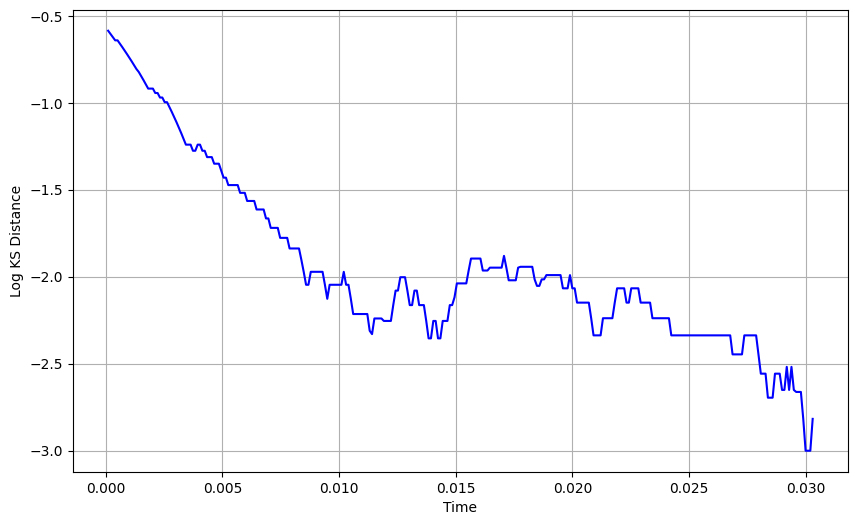

In [ ]:
# Plot kr_list against result
plt.figure(figsize=(10, 6))
plt.plot(time_ks, ks,color='blue')
plt.xlabel('Time')
plt.ylabel('Log KS Distance')

plt.grid(True)
plt.show()

## by time2

## Slope


In [ ]:
import numpy as np
from scipy.stats import linregress

# Example data

slope, intercept, r_value, p_value, std_err = linregress(result_sublist,log_kr_list)

print("Slope of the regression:", slope)


Slope of the regression: -78.92631854073507


In [ ]:
import numpy as np
from scipy.stats import linregress

# Example data

slope, intercept, r_value, p_value, std_err = linregress(result_sublist,log_ks_list)

print("Slope of the regression:", slope)

Slope of the regression: -63.74945359232131


#???


## cdf


In [ ]:
g3,m3,g_his3,m_his3=full_trade(agent_a,10000)

In [ ]:
import numpy as np

def compute_ecdf(data):
    """Compute the ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y



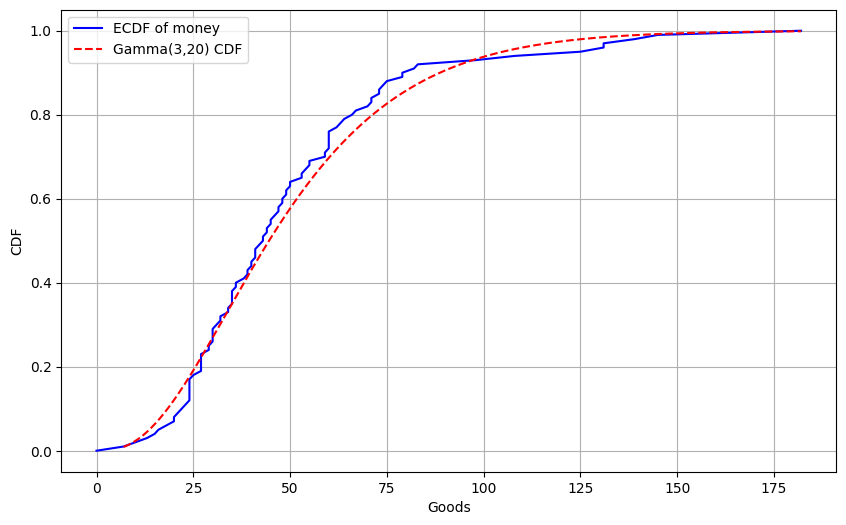

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma



x, y = compute_ecdf(m3)
x=x.tolist()
y=y.tolist()
# Parameters for the gamma distribution
x.insert(0, 0)
y.insert(0, 0)

# Define the range of x values
x_values = np.linspace(min(m3), max(m3), 1000)
gamma_cdf_values1 = gamma.cdf(x_values, 3, scale=50/3)
gamma_cdf_values2 = gamma.cdf(x_values, 3, scale=50/3)
gamma_cdf_values = 0.5 * gamma_cdf_values1 + 0.5 * gamma_cdf_values2
# Plot
plt.figure(figsize=(10,6))
plt.plot(x, y, label='ECDF of money', color='blue', linestyle='-')
plt.plot(x_values, gamma_cdf_values, label='Gamma(3,20) CDF', color='red', linestyle='--')
plt.xlabel('Goods')
plt.ylabel('CDF')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()